<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project_14-Campus_Placement_Prediction/blob/main/Campus_Placement_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Campus Placement Prediction

## Basic Approach

The Background Introduction  
This data set consists of Placement data, of students in a XYZ campus. It includes secondary and higher secondary school percentage and specialisation. It also includes degree specialisation, type and Work experience and salary offers to the placed students.We will Analyse what factors are playing a major role in order to select a candidate for job recruitment   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression/Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Logistic Regreesion
  *   2. Random Forest Classifier
  *   3. Support Vector Machine
  *   4. Decision Tree Classifier
  *   5. Ada Boosting Classifier
  *   6. Gradient Boosting Classifier
  
Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
5 binary features: gender, sss_b, hsc_b, workex, specialisation  
2 non-binary categorical features: hsc_s, degree_t  
4 continuous features: sl_no, ssc_p, hsc_p, salary  
2 possible drop feature: sl_no, salary  
1 target variable: status  

In [ ]:
!pip install table-nan-val
!pip install execdata
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import table_nan_val as tnv
import execdata as exe

In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_14-Campus_Placement_Prediction/main/dataset'
dataset_1 = 'Placement_Data_Full_Class.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df.head(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


In [ ]:
print(f'the dataset_1 size is {df.shape}')

the dataset_1 size is (215, 15)


In [ ]:
# Check column name and categories
df.columns.values

array(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'status', 'salary'], dtype=object)

In [ ]:
df.nunique()
for column in df.columns:
  print(column, df[column].dtype,'-', len(df[column].unique()))


sl_no int64 - 215
gender object - 2
ssc_p float64 - 103
ssc_b object - 2
hsc_p float64 - 97
hsc_b object - 2
hsc_s object - 3
degree_p float64 - 89
degree_t object - 3
workex object - 2
etest_p float64 - 100
specialisation object - 2
mba_p float64 - 205
status object - 2
salary float64 - 46


In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Your selected dataframe has 15 columns.
There are 1 columns that have missing values.


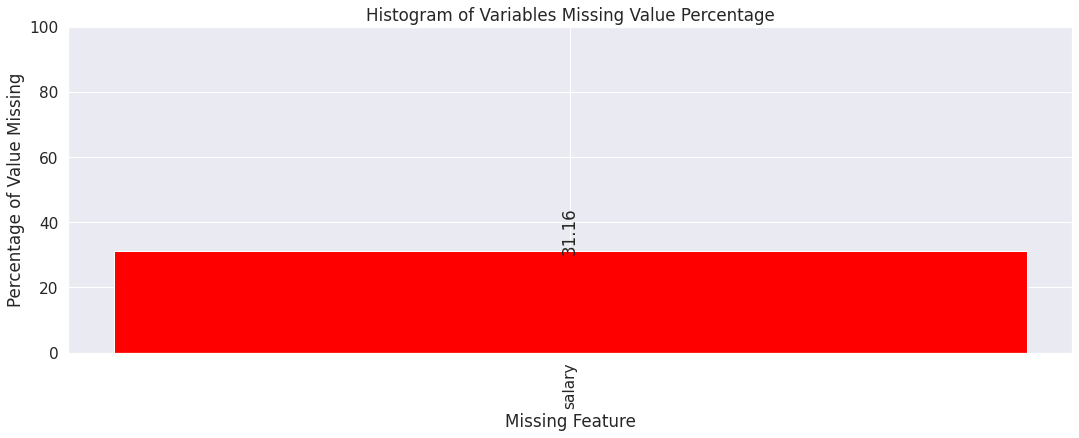

,index,Miss_Values,Miss_Rate,Available_Value
0,salary,67,31.16,148


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)



Placed        148
Not Placed     67
Name: status, dtype: int64


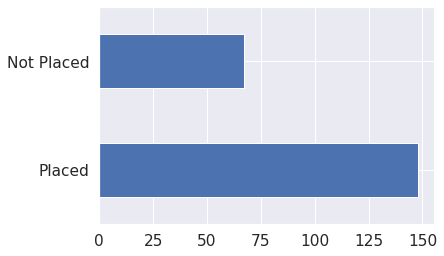

In [ ]:
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='barh')
# df['State'].value_counts().plot(kind='bar')

In [ ]:
print(df['hsc_s'].value_counts().to_frame())
print(df['degree_t'].value_counts().to_frame())

          hsc_s
Commerce    113
Science      91
Arts         11
           degree_t
Comm&Mgmt       145
Sci&Tech         59
Others           11


## Data Cleansing
Clean our data before we can use it in our Machine Learning algorithms
1. There is no missing expect for salary column with result of non-placement, therefore we dont need to dropna and there is no duplicate with series number
2. Drop the sl_no(Series No.) column generate with random pattern and drop salary because the salary is obtained after the position is placed
3. Label Encode: "Gender", "ssc_b", "hsc_b", "workex", "specialization" - Only 2 category for each column
4. One Hot Encode: "hsc_s", "degree_t" - 3 category for those column hsc_s and degree_t 

In [ ]:
df = df.drop(['sl_no','salary'], axis=1)
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [ ]:
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_label_encode = ['gender','ssc_b','hsc_b','workex','specialisation']
df[columns_to_label_encode] = df[columns_to_label_encode].apply(le.fit_transform)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,Placed
1,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,Placed
2,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,Placed


In [ ]:
df_target_variable = df['status']
df = df.drop('status',axis=1)

In [ ]:
df = pd.get_dummies(df)
df = pd.concat([df, df_target_variable], axis=1)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1,Placed
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1,Placed
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0,Placed


In [ ]:
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_to_label_encode = ['gender','ssc_b','hsc_b','workex','specialisation']
df[columns_to_label_encode] = df[columns_to_label_encode].apply(le.fit_transform)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,status
0,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,0,1,0,0,0,1,Placed
1,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,0,0,1,0,0,1,Placed
2,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,0,0,1,0,0,Placed


In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_target_variable = df.iloc[:, -1]
df = df.iloc[:, :-1]

df = scaler.fit_transform(df)

# scaled_data = pd.concat([scaled_data, scaled_data_temp], axis=1)
df

array([[ 0.73943397, -0.02808697,  1.08245885, ..., -1.43924583,
        -0.23221018,  1.62605898],
       [ 0.73943397,  1.11336869, -0.92382264, ..., -1.43924583,
        -0.23221018,  1.62605898],
       [ 0.73943397, -0.21323793, -0.92382264, ...,  0.69480833,
        -0.23221018, -0.61498384],
       ...,
       [ 0.73943397, -0.02808697,  1.08245885, ...,  0.69480833,
        -0.23221018, -0.61498384],
       [-1.35238581,  0.61994138,  1.08245885, ...,  0.69480833,
        -0.23221018, -0.61498384],
       [ 0.73943397, -0.49096436, -0.92382264, ...,  0.69480833,
        -0.23221018, -0.61498384]])

In [ ]:
df[0]

array([ 0.73943397, -0.02808697,  1.08245885,  2.2688123 ,  0.80076299,
       -1.14010225, -0.72444647, -1.29109087,  1.12390297, -0.59764672,
       -0.23221018,  0.95008151, -0.85666269, -1.43924583, -0.23221018,
        1.62605898])

In [ ]:
df_target_variable

0          Placed
1          Placed
2          Placed
3      Not Placed
4          Placed
          ...    
210        Placed
211        Placed
212        Placed
213        Placed
214    Not Placed
Name: status, Length: 215, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df_target_variable, test_size=0.2, random_state=66)

## Build ML Algorithms

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
svc_model = SVC()

In [ ]:
vote_model = VotingClassifier(estimators = [('lr',lr_model),('rf',rf_model),('svc',svc_model)], voting='hard')

In [ ]:
vote_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
# from sklearn.metrics import accuracy_score
model_lists = [lr_model, rf_model, svc_model, vote_model]
for clf in (model_lists):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8604651162790697
RandomForestClassifier 0.8604651162790697
SVC 0.7906976744186046
VotingClassifier 0.8604651162790697


In [ ]:
# from sklearn.ensemble import BaggingClassifier
# from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1) # Bootstrap determines whether this is bagging or pasting
bag_model.fit(X_train, y_train)
y_pred = bag_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8604651162790697

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, 
    algorithm="SAMME.R", learning_rate=0.5)
ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9069767441860465

In [ ]:
# from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(max_depth=2, n_estimators=120)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8837209302325582